In [2]:
from reader import *
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

from utils import *

/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
idx = 4

In [4]:
filename = 'voc_2007_train.txt'
f = open(filename, 'r')
lines = f.readlines()
line = lines[idx]
record = line.strip().split(' ')
img_path = record[0]
coords = [int(e) for e in record[1:]]

In [5]:
df = Data(filename, shuffle=False, flip=False, affine_trans=False)

In [6]:
df.reset_state()

In [7]:
g = df.get_data()

In [8]:
for _ in range(idx+1):
    pb = next(g)

In [9]:
img = misc.imread(img_path)
height, width, _ = img.shape

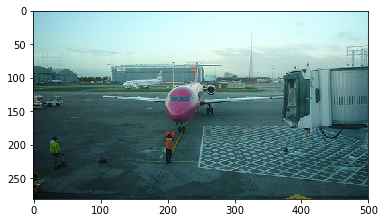

In [10]:
plt.imshow(img)

In [11]:
image, gt_box_coord, anchor_cls, anchor_neg_mask, anchor_loc, shape = pb

In [12]:
anchor_cls.shape

(8732,)

In [13]:
anchor_idx_ary = np.nonzero(anchor_cls)[0]

In [16]:
anchor_idx_ary

array([2020, 2024, 2026, 2172, 2176, 2178, 6617, 6623, 6624, 6629, 6630,
       6635, 6725, 6730, 6731, 6736, 6737, 6738, 6742, 6743, 6744, 6748,
       6749, 6755, 6844, 6845, 6850, 6851, 6852, 6856, 6857, 6858, 6862,
       6863, 8146, 8147, 8200, 8202, 8204, 8206, 8207, 8208, 8210, 8212,
       8214, 8216, 8266, 8267, 8614])

In [17]:
anchor_loc_ary = anchor_loc[anchor_idx_ary]
anchor_ary = cfg.all_anchors[anchor_idx_ary]

In [18]:
# draw the gt box
anchor_img = np.copy(img)
i = 0
while i < len(coords):
    xmin = coords[i]
    ymin = coords[i + 1]
    xmax = coords[i + 2]
    ymax = coords[i + 3]
    i += 5
    
    anchor_img = cv2.rectangle(anchor_img,
                               (int(xmin), int(ymin)),                     
                               (int(xmax), int(ymax)),
                               (0, 255, 0),                
                               3)

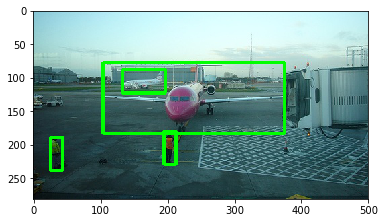

In [19]:
plt.imshow(anchor_img)

In [20]:
anchor_ary.shape

(49, 6)

In [21]:
for anchor in anchor_ary:
    x, y, w, h = anchor[:4]
    xmin = (x - w / 2) * width
    xmax = (x + w / 2) * width
    ymin = (y - h / 2) * height
    ymax = (y + h / 2) * height
#     import pdb
#     pdb.set_trace()
    anchor_img = cv2.rectangle(anchor_img,
                               (int(xmin), int(ymin)),                     
                               (int(xmax), int(ymax)),
                               (0, 0, 255),                
                               1)

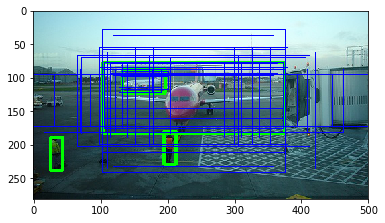

In [22]:
plt.imshow(anchor_img)

In [23]:
misc.imsave('anchor.jpg', anchor_img)

In [24]:
box_img = np.copy(img)

In [25]:
anchor_loc_ary

array([[ 2.33333274,  1.54448253,  1.23430032,  1.09789235],
       [-0.33333432,  1.54448253,  1.23430032,  1.09789235],
       [-0.23570295,  2.18422808, -0.49856779,  2.83076015],
       [ 2.33333274, -1.12218155,  1.23430032,  1.09789235],
       [-0.33333432, -1.12218155,  1.23430032,  1.09789235],
       [-0.23570295, -1.58700432, -0.49856779,  2.83076015],
       [ 1.95554126,  1.59445453,  1.46950073, -0.39002448],
       [ 0.63534431,  1.59445453,  1.46950073, -0.39002448],
       [ 0.53379599,  2.67921953,  0.59873402,  2.20494471],
       [-0.6848519 ,  1.59445453,  1.46950073, -0.39002448],
       [-0.57539069,  2.67921953,  0.59873402,  2.20494471],
       [-2.00504884,  1.59445453,  1.46950073, -0.39002448],
       [ 3.27573821,  0.27425759,  1.46950073, -0.39002448],
       [ 2.32352921,  0.32586657,  2.33160187,  0.47207666],
       [ 1.95554126,  0.27425759,  1.46950073, -0.39002448],
       [ 0.75490152,  0.32586657,  2.33160187,  0.47207666],
       [ 0.63534431,  0.

In [26]:
for idx, encode_box in enumerate(anchor_loc_ary):
    anchor_box = anchor_ary[idx]
    anchor_box = Box(*anchor_box[:4])
    decoded_box = decode_box(encode_box, anchor_box)
    xmin = (decoded_box.x - decoded_box.w / 2) * width
    xmax = (decoded_box.x + decoded_box.w / 2) * width
    ymin = (decoded_box.y - decoded_box.h / 2) * height
    ymax = (decoded_box.y + decoded_box.h / 2) * height
    box_img = cv2.rectangle(box_img,
                            (int(xmin), int(ymin)),                     
                            (int(xmax), int(ymax)),
                            (255, 0, 0),                
                            3)

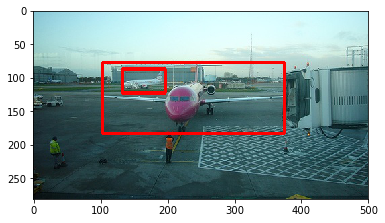

In [27]:
plt.imshow(box_img)